In [ ]:
%pip install numpy
%pip install pandas
%pip install torch
%pip install torchvision
%pip install matplotlib
%pip install d2l==1.0.3

In [60]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import d2l
from d2l import torch as d2l
%matplotlib inline

## Part 1: Linear Neural Networks for Classification

##### This part builds a softmax regressor model from scratch to fit on the FashionMNIST dataset


60000 10000


torch.Size([1, 28, 28])

torch.Size([64, 1, 28, 28]) torch.float32 torch.Size([64]) torch.int64


##### Q1. 10 images were visualized from the FashionMNIST dataset and can be found below:

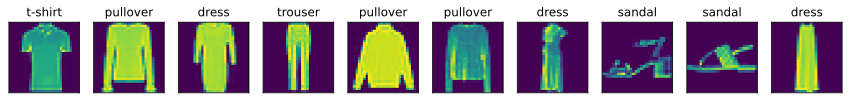

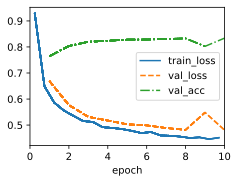

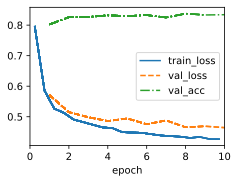

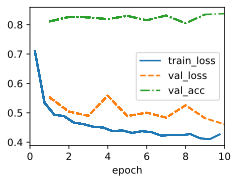

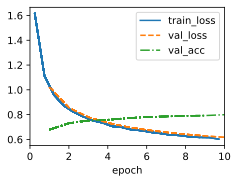

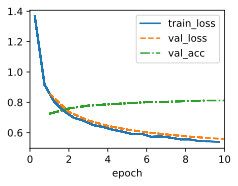

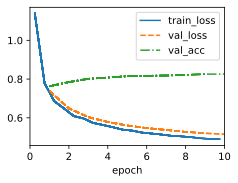

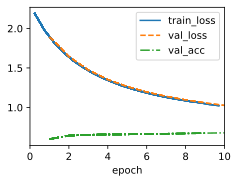

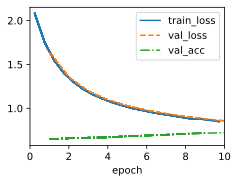

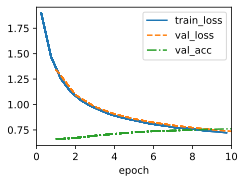

##### Q2. I used three learning rates (0.1, 0.01, and 0.001) and three batch size settings (256, 128, 64). I observed that reducing the learning rates decreased the validation accuracy. Reducing the batch size on the other hand, resulted in an increase in the validation accuracy.

##### Q3. The overflow problem in softmax occurs when exp(o_j) becomes too large, and it happens when some of the o_k values are large positive values.The underflow problem on the other hand occurs when exp(o_j) becomes too small, and it occurs when some of the o_k values are large negative numbers. By subtracting õ from all scores, the maximum score we could ever get in the numerator will be 0 ( õ – õ = 0), and the exponent of this maximum value is exp(0) = 1, which is valid because our numerator will never be greater than 1, hence no overflow problems.However, this solution is not perfect as it can still lead to underflow problems. For example, if the difference between õ and the other o_k values is large and negative, then the epx(o_k – õ) can still underflow to zero

## Part 2: Multilayer Perceptrons (MLPs)

##### This part builds a MLP from scratch with 1 hidden layer to train on the FashioMNIST dataset. I tried combinations of multiple learning rates (0.1, 0.01, and 0.001) and multiple batch sizes (256, 128, 64). Each of these sceneraios have been kept in a separate cells that can be run and visualized

##### Q1. For the Sigmoid activation function, gradient vanishes when there are large positive and negative arguments. I tried sigmoid function on large negative values (-50000, -10000) and observed the vanishing gradient. The cell below depicts how gradient vanishes when there are large negative arguments:

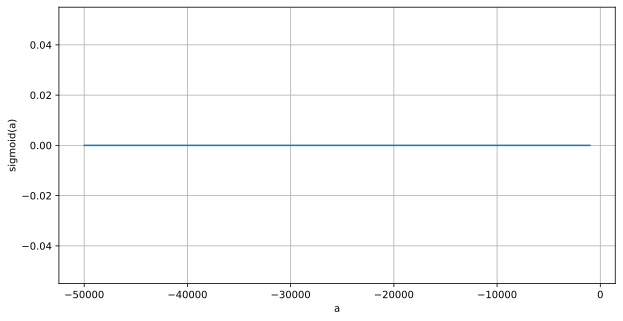

### Implementation of MLP from scratch

##### Q2. After training with a hidden layer with only 1 neuron, I observed that the validation accuracy decreases drastically, even less than what was observed with softmax only. Training and validation losses are also worse than in softmax. This is because we mapped 784 inputs to only 1 feature, thus we lost almost all the important features before activation, unlike the model with 256 neurons in its hidden layer, where we mapped the 784 inputs to the 256 neurons before the classification into 10 classes. Below are images showing what was observed:

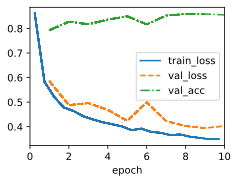

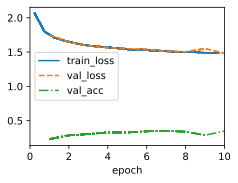

##### Q3. Backpropagation requires that we calculate and store intermediate values and parameters from forward propagation, and this requires significantly more memory than plain prediction.

## Part 3: Basic Convolutional Neural Networks (LeNet from scratch)

##### The first half of this part aims to compare the difference in training the LeNet architecture on the FashionMNIST dataset using (Sigmoid activation function and average pooling) and a modified LeNet architecture using (ReLU activation function and max-pooling), and to also compare the effects of increasing the number of epochs when training. The last half is to fit the modified LeNet (with ReLU and max-pooling) on the handwritten MNIST dataset. 

Conv2d output shape	 torch.Size([1, 6, 28, 28])
Sigmoid output shape	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape	 torch.Size([1, 6, 14, 14])
Conv2d output shape	 torch.Size([1, 16, 14, 14])
Sigmoid output shape	 torch.Size([1, 16, 14, 14])
AvgPool2d output shape	 torch.Size([1, 16, 7, 7])
Flatten output shape	 torch.Size([1, 784])
Linear output shape	 torch.Size([1, 120])
Sigmoid output shape	 torch.Size([1, 120])
Linear output shape	 torch.Size([1, 84])
Sigmoid output shape	 torch.Size([1, 84])
Linear output shape	 torch.Size([1, 10])


##### Q1. I tried epochs 5, 10, and 20 on the FashionMNIST dataset using the original LeNet and observed that increasing the epoch number resulted in improvements in the training and validation loss, as well as the validation accuracy. The images below show the performance and effects of increasing number of epochs:

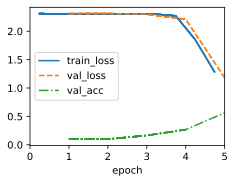

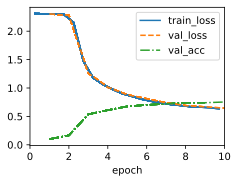

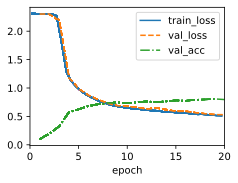

##### Modifying LeNet by using ReLU in place of Sigmoid, and MaxPool2D in place of AvgPool2d

##### Q2. In this experiment, I replaced the average pooling with max-pooling and replaced Sigmoid with ReLU. This part yielded much better accuracy than the previous step. Increasing the number of epochs yielded better accuracy as well. Below are my results:

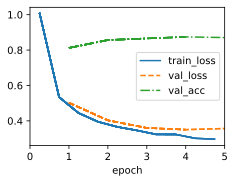

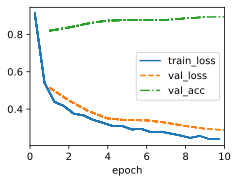

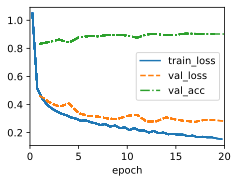

##### Using MNIST Dataset for Training

##### Q3. In this step, I performed the same experiment as done in question 2 but used the MNIST handwritten dataset instead. The model performed much better on the MNIST dataset than the FashionMNIST, producing a high validation accuracy, as well as improved training/validation losses. results are plotted:

Epoch 1/5 Train Loss: 0.2415 Val Loss: 0.1655 Val Acc: 0.9475
Epoch 2/5 Train Loss: 0.0654 Val Loss: 0.0473 Val Acc: 0.9850
Epoch 3/5 Train Loss: 0.0467 Val Loss: 0.0537 Val Acc: 0.9818
Epoch 4/5 Train Loss: 0.0351 Val Loss: 0.0510 Val Acc: 0.9827
Epoch 5/5 Train Loss: 0.0295 Val Loss: 0.0325 Val Acc: 0.9900


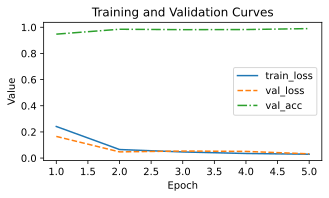

Epoch 1/10 Train Loss: 0.2480 Val Loss: 0.1110 Val Acc: 0.9627
Epoch 2/10 Train Loss: 0.0711 Val Loss: 0.0501 Val Acc: 0.9841
Epoch 3/10 Train Loss: 0.0498 Val Loss: 0.0463 Val Acc: 0.9850
Epoch 4/10 Train Loss: 0.0387 Val Loss: 0.0552 Val Acc: 0.9806
Epoch 5/10 Train Loss: 0.0319 Val Loss: 0.0497 Val Acc: 0.9828
Epoch 6/10 Train Loss: 0.0264 Val Loss: 0.0363 Val Acc: 0.9879
Epoch 7/10 Train Loss: 0.0226 Val Loss: 0.0335 Val Acc: 0.9876
Epoch 8/10 Train Loss: 0.0187 Val Loss: 0.0292 Val Acc: 0.9901
Epoch 9/10 Train Loss: 0.0146 Val Loss: 0.0578 Val Acc: 0.9821
Epoch 10/10 Train Loss: 0.0127 Val Loss: 0.0284 Val Acc: 0.9912


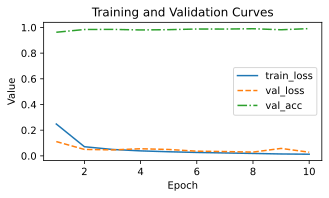

Epoch 1/20 Train Loss: 0.2366 Val Loss: 0.0672 Val Acc: 0.9780
Epoch 2/20 Train Loss: 0.0669 Val Loss: 0.0586 Val Acc: 0.9817
Epoch 3/20 Train Loss: 0.0484 Val Loss: 0.0422 Val Acc: 0.9866
Epoch 4/20 Train Loss: 0.0379 Val Loss: 0.0441 Val Acc: 0.9870
Epoch 5/20 Train Loss: 0.0319 Val Loss: 0.0356 Val Acc: 0.9893
Epoch 6/20 Train Loss: 0.0246 Val Loss: 0.0466 Val Acc: 0.9856
Epoch 7/20 Train Loss: 0.0205 Val Loss: 0.0348 Val Acc: 0.9894
Epoch 8/20 Train Loss: 0.0186 Val Loss: 0.0434 Val Acc: 0.9881
Epoch 9/20 Train Loss: 0.0155 Val Loss: 0.0320 Val Acc: 0.9904
Epoch 10/20 Train Loss: 0.0131 Val Loss: 0.0322 Val Acc: 0.9905
Epoch 11/20 Train Loss: 0.0105 Val Loss: 0.0346 Val Acc: 0.9905
Epoch 12/20 Train Loss: 0.0091 Val Loss: 0.0437 Val Acc: 0.9889
Epoch 13/20 Train Loss: 0.0095 Val Loss: 0.0389 Val Acc: 0.9898
Epoch 14/20 Train Loss: 0.0083 Val Loss: 0.0370 Val Acc: 0.9903
Epoch 15/20 Train Loss: 0.0072 Val Loss: 0.0426 Val Acc: 0.9888
Epoch 16/20 Train Loss: 0.0054 Val Loss: 0.0378 V

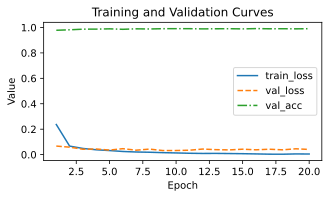